# Lorenz Example

In [1]:
import os
current_wd = os.getcwd()
os.chdir(current_wd.split("scikit-identification")[0] + "scikit-identification")
from skmid.models import generate_model_attributes, DynamicModel
from skmid.integrator import RungeKutta4
os.chdir(current_wd)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
if "skmid" in plt.style.available:
    plt.style.use("skmid")

In [6]:
(x, u, _) = generate_model_attributes(state_size=1, input_size=1)
model = DynamicModel(state=x, input=u, model_dynamics=[2*x**2 + u])
model.print_summary()

Input Summary
-----------------
states    = ['x1']
inputs    = ['u1']
parameter = None
output    = ['x1']

Dimension Summary
-----------------
 Number of inputs: 2
  Input 0 ("x(t)"): 1x1
  Input 1 ("u(t)"): 1x1
 Number of outputs: 1
  Output 0 ("xdot(t) = f(x(t), u(t))"): 1x1


Note that output is equal to states when not specified.

Construct Lorenz system (more info [here](https://en.wikipedia.org/wiki/Lorenz_system)).

In [7]:
(states, inputs, param) = generate_model_attributes(state_size=3, input_size=3, parameter_size=3)

Define sub-variables for better readibility of the equation

In [10]:
(x,y,z) = states[0], states[1], states[2]
(sigma, rho, beta) = param[0], param[1], param[2]
model_dynamics = [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
model = DynamicModel(
        state=states,
        parameter=param,
        model_dynamics=model_dynamics,
        state_name = ['x', 'y', 'z'], # ensure the correct order
        parameter_name = ['sigma', 'rho', 'beta'])

In [11]:
model.print_summary()

Input Summary
-----------------
states    = ['x', 'y', 'z']
inputs    = None
parameter = ['sigma', 'rho', 'beta']
output    = ['x', 'y', 'z']

Dimension Summary
-----------------
 Number of inputs: 2
  Input 0 ("x(t)"): 3x1
  Input 1 ("p"): 3x1
 Number of outputs: 1
  Output 0 ("xdot(t) = f(x(t), p)"): 3x1


Evalute function. Lorenz used the following parameter sigma=10, rho=8/3, beta=28.

The x would represent the initial condition set at x0=0.0, y0=40.0, z0=0.01

In [15]:
eval_df = model.evaluate(state_num=[0.0, 40.0, 0.01], parameter_num=[10, 8/3, 28])
eval_df

,x,y,z
0,400.0,-40.0,-0.28


### Define lorenz system and run forward simulation using RungeKutta4() integrator

In [19]:
# define states and parameters
(states, _, _) = generate_model_attributes(state_size=3)
x, y, z = states[0], states[1], states[2]

sigma = 10
rho = 28
beta = 8.0 / 3.0

# dx = f(states) <==> rhs = f(x)
rhs = [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
model = DynamicModel(state=states, model_dynamics=rhs, state_name=["x", "y", "z"])

# invoke integrator
rk4 = RungeKutta4(model=model, fs=100)
_ = rk4.simulate(initial_condition=[1, 1, 1], n_steps=5000)

df_sim = rk4.output_sim_

In [20]:
model.print_summary()

Input Summary
-----------------
states    = ['x', 'y', 'z']
inputs    = None
parameter = None
output    = ['x', 'y', 'z']

Dimension Summary
-----------------
 Number of inputs: 1
  Input 0 ("x(t)"): 3x1
 Number of outputs: 1
  Output 0 ("xdot(t) = f(x(t))"): 3x1


In [21]:
df_sim.head()

,x,y,z
0.00,1.000000,1.000000,1.000000
0.01,1.012567,1.259918,0.984891
0.02,1.048824,1.523997,0.973114
0.03,1.107209,1.798310,0.965159
0.04,1.186868,2.088540,0.961737


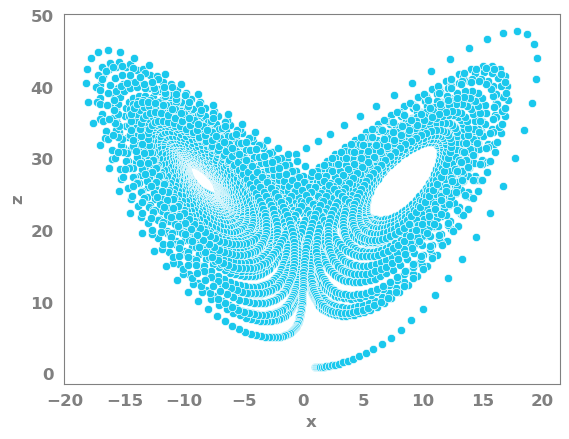

In [24]:
_ = sns.scatterplot(data=df_sim,
                x="x",
                y="z")